<a href="https://colab.research.google.com/github/SelectBillyFromC/Project699/blob/main/Project_699_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.1                         
year           2021                        
month          08                          
day            10                          
svn rev        80725                       
language       R                           
version.string R version 4.1.1 (2021-08-10)
nickname       Kick Things                 

In [ ]:
getwd()

[1] "/content"

In [ ]:
library('tidyverse')


In [ ]:
csv <- read.csv('Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_.csv')
tib <- as_tibble(csv)
head(tib)

Survey.ID,Age,Gender,Ethnicity,Marital.Status,Education.Completed,Household.Size,No.One,Spouse,Children,⋯,Other.Description..Non.city.based.Ethnic.,Paper..Non.city.based.General.,TV.Radio..Non.city.based.General.,Website..Non.city.based.General.,Social.Networks..Non.city.based.General.,People..Non.city.based.General.,Other..Non.city.based.General.,Other.Description..Non.city.based.General.,Preferred.Type,Concerns
<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
80314,NA,,Vietnamese,,NA,NA,,,,⋯,,,,,,,,,,
60171,60,Male,Chinese,Married,13,6,0,0,Living with children,⋯,,,,,,,,,,
1011601,23,Female,Chinese,Single,16,3,0,0,0,⋯,,No,No,No,No,Yes,No,,email,traffic
50046,73,Female,Chinese,Other,13,1,Living with no one,0,0,⋯,,,,,,,,,,
10494,29,Male,Asian Indian,Single,17,1,Living with no one,0,0,⋯,,,,,,,,,,
10786,34,Female,Asian Indian,Married,17,3,0,Living with spouse,Living with children,⋯,,,,,,,,,,


Called the dataset here to env locally.. I'm not sure if we can mount Google Drive here. Let's see if the data stays in the dir.

In [ ]:
tib %>% count(Ethnicity)

Ethnicity,n
<chr>,<int>
,2
Asian Indian,574
Chinese,639
Filipino,265
Korean,471
Other,144
Vietnamese,514


In [ ]:
tib %>% summarise(across(everything(), ~ sum(is.na(.))))

Survey.ID,Age,Gender,Ethnicity,Marital.Status,Education.Completed,Household.Size,No.One,Spouse,Children,⋯,Other.Description..Non.city.based.Ethnic.,Paper..Non.city.based.General.,TV.Radio..Non.city.based.General.,Website..Non.city.based.General.,Social.Networks..Non.city.based.General.,People..Non.city.based.General.,Other..Non.city.based.General.,Other.Description..Non.city.based.General.,Preferred.Type,Concerns
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,9,0,0,0,37,17,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Data Preprocessing

Data Cleaning



Removing missing values

In [ ]:
tib1 <- na.omit(tib)

summary_na <- function(v){
  if(!any(is.na(v))){
    res <- c(summary(v),"NA's"=0)
  } else{
    res <- summary(v)
  }
  return(res)
}

summary_na(tib1)

"Min.   :4.000e+00  " "1st Qu.:1.081e+04  " "Median :5.014e+04  " 
                                                                  
"Mean   :2.296e+06  " "3rd Qu.:7.041e+04  " "Max.   :1.104e+09  " 
                                                                  
    "Min.   :18.00  "     "1st Qu.:28.00  "     "Median :37.00  " 
                                                                  
    "Mean   :40.15  "     "3rd Qu.:49.00  "     "Max.   :89.00  " 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
     "Min.   : 3.0  "      "1st Qu.:15.0  "      "Median :16.0  " 
                                                                  
     "Mean   :15.5  "      "3rd Qu.:17.0  "      "Max.   :17.0  " 
                                                                  
    "Min.   :1.000  "     "1st Qu.:2.000  "     "Median :3.000  " 
                                                                  
    "Mean   :3.276  "     "3rd Qu.:4.000  "     "Max.   :8.000  " 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
        "Min.   :0  "         "1st Qu.:0  "         "Median :0  " 
                                                                  
        "Mean   :0  "         "3rd Qu.:0  "         "Max.   :0  " 
                                                                  
 "Length:1336       "  "Class :character  "  "Mode  :character  " 
                                                                  
                   NA                    NA                    NA 
                                                                  
        "Min.   :0  "         "1st Qu.:0  "         "Median :0  " 
                                                                  
        "Mean   :0  "         "3rd Qu.:0  "         "Max.   :0  " 
                                               

Checking for noisy data (if any value<0)

In [ ]:
lapply(select_if(tib1, is.numeric), function(x) all(x < 0))

$Survey.ID
[1] FALSE

$Age
[1] FALSE

$Education.Completed
[1] FALSE

$Household.Size
[1] FALSE

$Grandparent
[1] FALSE

$Other.Relative
[1] FALSE

$Other
[1] FALSE

$Self.Employed.Full.Time
[1] FALSE

$Self.Employed.Part.Time
[1] FALSE

$Disabled
[1] FALSE

$Unemployed
[1] FALSE

$Other.Employement
[1] FALSE

$Achieving.Ends.Meet
[1] FALSE

$Duration.of.Residency
[1] FALSE

$Primary.Language
[1] FALSE

$Discrimination
[1] FALSE

$Hygiene.Assistance
[1] FALSE

$Smoking
[1] FALSE

$Drinking
[1] FALSE

$Regular.Exercise
[1] FALSE

$Healthy.Diet
[1] FALSE

$Heart.Disease
[1] FALSE

$Stroke
[1] FALSE

$Cancer
[1] FALSE

$Hepatitis
[1] FALSE

$Kidney.Problem
[1] FALSE

$Asthma
[1] FALSE

$COPD
[1] FALSE

$users
[1] FALSE

$Other.1
[1] FALSE

$Quality.of.Life
[1] FALSE

$Psychiatrist
[1] FALSE

$Therapist.Counselor
[1] FALSE

$See.Family
[1] FALSE

$Close.Family
[1] FALSE

$Helpful.Family
[1] FALSE

$See.Friends
[1] FALSE

$Close.Friends
[1] FALSE

$Helpful.Friends
[1] FALSE

$Residency
[1] FALSE

$Other.Transportation
[1] FALSE

Checking for noisy data. If any numeric va

In [ ]:
(others <- (grep(c("Other"), colnames(tib1))))
c(colnames(tib1)[others], "Health.Info.Discription",  "Status.of.Ownership..Other.")

tib2 <- select(tib1, -c(c(colnames(tib1)[others], "Health.Info.Discription", "Status.of.Ownership..Other.", "Preferred.Type", "Concerns")))

[1]  15  17  18  20  30  31  33  89 111 183 185 197 198 214 215 221 222 228 229

[1] "Other.Relative"                            
 [2] "Other"                                     
 [3] "Other.Description"                         
 [4] "Religion.Other"                            
 [5] "Other.Employement"                         
 [6] "Other.Employment.Description"              
 [7] "Occupation.Other"                          
 [8] "Other.1"                                   
 [9] "Concern.for.Others..AD."                   
[10] "Housing..Other."                           
[11] "Status.of.Ownership..Other."               
[12] "Other.Transportation"                      
[13] "Other.Transportation.Description"          
[14] "Other..City.based."                        
[15] "Other.Description..City.based."            
[16] "Other..Non.city.based.Ethnic."             
[17] "Other.Description..Non.city.based.Ethnic." 
[18] "Other..Non.city.based.General."            
[19] "Other.Description..Non.city.based.General."
[20] "Health.Info.Discription"                   
[21] "Status.of.Ownership..Other."

Encoding categorical data

In [ ]:
tib2$No.One = factor(tib2$No.One,
              levels = c('Living with no one', '0'), 
              labels = c(1, 0))

In [ ]:
tib2

Survey.ID,Age,Gender,Ethnicity,Marital.Status,Education.Completed,Household.Size,No.One,Spouse,Children,⋯,Paper..Non.city.based.Ethnic.,TV.Radio..Non.city.based.Ethnic.,Website..Non.city.based.Ethnic.,Social.Networks..Non.city.based.Ethnic.,People..Non.city.based.Ethnic.,Paper..Non.city.based.General.,TV.Radio..Non.city.based.General.,Website..Non.city.based.General.,Social.Networks..Non.city.based.General.,People..Non.city.based.General.
<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
60171,60,Male,Chinese,Married,13,6,NA,0,Living with children,⋯,,,,,,,,,,
1011601,23,Female,Chinese,Single,16,3,NA,0,0,⋯,Yes,No,No,No,Yes,No,No,No,No,Yes
50046,73,Female,Chinese,Other,13,1,1,0,0,⋯,,,,,,,,,,
10494,29,Male,Asian Indian,Single,17,1,1,0,0,⋯,,,,,,,,,,
10786,34,Female,Asian Indian,Married,17,3,NA,Living with spouse,Living with children,⋯,,,,,,,,,,
10809,28,Male,Asian Indian,Married,17,2,NA,Living with spouse,0,⋯,No,No,No,No,No,No,No,No,No,No
10858,47,Male,Asian Indian,Married,17,5,NA,Living with spouse,Living with children,⋯,,,,,,,,,,
10856,25,Male,Asian Indian,Single,17,1,1,0,0,⋯,,,,,,,,,,
10103,60,Female,Asian Indian,Single,17,3,NA,0,0,⋯,No,Yes,No,No,No,No,Yes,No,No,No


Checking for Inconsistent data

In [ ]:
subset1 <- subset(tib2, tib2$No.One == 1 & tib2$Household.Size > 1)
subset1
anti_join(tib2, subset1) -> tib3
tib3

Survey.ID,Age,Gender,Ethnicity,Marital.Status,Education.Completed,Household.Size,No.One,Spouse,Children,⋯,Paper..Non.city.based.Ethnic.,TV.Radio..Non.city.based.Ethnic.,Website..Non.city.based.Ethnic.,Social.Networks..Non.city.based.Ethnic.,People..Non.city.based.Ethnic.,Paper..Non.city.based.General.,TV.Radio..Non.city.based.General.,Website..Non.city.based.General.,Social.Networks..Non.city.based.General.,People..Non.city.based.General.
<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
60050,18,,Chinese,Single,12,5,1,0,0,⋯,No,Yes,No,No,No,No,No,Yes,No,No
60111,26,Male,Chinese,Single,17,4,1,0,0,⋯,No,No,No,No,Yes,No,No,No,No,No
40193,24,Male,Chinese,Single,16,4,1,0,0,⋯,No,No,No,No,No,No,No,No,No,No
60901,50,Female,Chinese,Married,17,4,1,0,0,⋯,No,No,No,No,No,No,No,No,No,No
10828,25,Male,Asian Indian,Single,17,4,1,0,0,⋯,No,No,Yes,Yes,No,No,No,Yes,No,Yes
70204,21,Female,Korean,Single,15,4,1,0,0,⋯,No,No,No,No,Yes,Yes,Yes,No,No,No
70219,50,Male,Korean,Married,17,4,1,Living with spouse,Living with children,⋯,Yes,No,No,No,Yes,Yes,Yes,No,No,No
80168,25,Female,Vietnamese,Single,15,6,1,0,0,⋯,No,No,No,No,No,No,No,No,No,No
80104,25,Female,Vietnamese,Single,13,4,1,0,0,⋯,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


Joining, by = c("Survey.ID", "Age", "Gender", "Ethnicity", "Marital.Status", "Education.Completed", "Household.Size", "No.One", "Spouse", "Children", "Grand.Children", "Parent", "Grandparent", "Brother.Sister", "Friends", "Religion", "Full.Time.Employment", "Part.Time.Employment", "Self.Employed.Full.Time", "Self.Employed.Part.Time", "Student", "Homemaker", "Disabled", "Unemployed", "Retired", "Occupation", "Income", "Achieving.Ends.Meet", "US.Born", "Duration.of.Residency", "Primary.Language", "English.Speaking", "English.Difficulties", "Familiarity.with.America", "Familiarity.with.Ethnic.Origin", "Identify.Ethnically", "Belonging", "Discrimination", "Present.Health", "Present.Mental.Health", "Present.Oral.Health", "Hygiene.Assistance", "Smoking", "Drinking", "Regular.Exercise", "Healthy.Diet", "Hypertension", "Heart.Disease", "Stroke", "Diabetes", "Cancer", "Arthritis", "Hepatitis", "Kidney.Problem", "Asthma", "COPD", "Physical.Check.up", "Dentist.Check.up", "Urgentcare", "Folkmedici

Survey.ID,Age,Gender,Ethnicity,Marital.Status,Education.Completed,Household.Size,No.One,Spouse,Children,⋯,Paper..Non.city.based.Ethnic.,TV.Radio..Non.city.based.Ethnic.,Website..Non.city.based.Ethnic.,Social.Networks..Non.city.based.Ethnic.,People..Non.city.based.Ethnic.,Paper..Non.city.based.General.,TV.Radio..Non.city.based.General.,Website..Non.city.based.General.,Social.Networks..Non.city.based.General.,People..Non.city.based.General.
<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10103,60,Female,Asian Indian,Single,17,3,0,0,0,⋯,No,Yes,No,No,No,No,Yes,No,No,No
50071,65,Male,Chinese,Married,17,2,0,Living with spouse,0,⋯,No,No,No,No,No,No,No,No,No,No
10040092,49,Male,Chinese,Married,17,4,0,0,Living with children,⋯,No,Yes,No,No,Yes,No,Yes,No,No,Yes
60014,19,Female,Chinese,Single,16,2,0,0,0,⋯,No,No,No,No,No,No,No,No,No,No
40214,32,Female,Chinese,Married,17,2,0,Living with spouse,0,⋯,No,No,No,No,Yes,No,No,No,No,Yes
40149,18,Female,Chinese,Single,13,4,0,0,0,⋯,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
60123,22,Male,Chinese,Single,17,4,0,0,0,⋯,No,No,Yes,No,No,No,No,Yes,No,No
10040050,18,Female,Chinese,Single,12,4,0,0,0,⋯,No,No,No,No,No,Yes,No,No,Yes,No
60122,26,Male,Chinese,Living with a partner,17,3,0,0,0,⋯,No,No,Yes,No,No,No,No,Yes,No,No


In [ ]:
cor(tib3$Duration.of.Residency, tib3$Quality.of.Life)

[1] NA

ERROR: ignored

Checking for Outliers

In [ ]:
summary(tib3)

   Survey.ID              Age           Gender           Ethnicity        
 Min.   :4.000e+00   Min.   :18.00   Length:1324        Length:1324       
 1st Qu.:1.080e+04   1st Qu.:28.00   Class :character   Class :character  
 Median :5.013e+04   Median :37.00   Mode  :character   Mode  :character  
 Mean   :2.316e+06   Mean   :40.25                                        
 3rd Qu.:7.040e+04   3rd Qu.:49.00                                        
 Max.   :1.104e+09   Max.   :89.00                                        
 Marital.Status     Education.Completed Household.Size  No.One  
 Length:1324        Min.   : 3.0        Min.   :1.000   1:  91  
 Class :character   1st Qu.:15.0        1st Qu.:2.000   0:1233  
 Mode  :character   Median :16.0        Median :3.000           
                    Mean   :15.5        Mean   :3.265           
                    3rd Qu.:17.0        3rd Qu.:4.000           
                    Max.   :17.0        Max.   :8.000           
    Spouse          

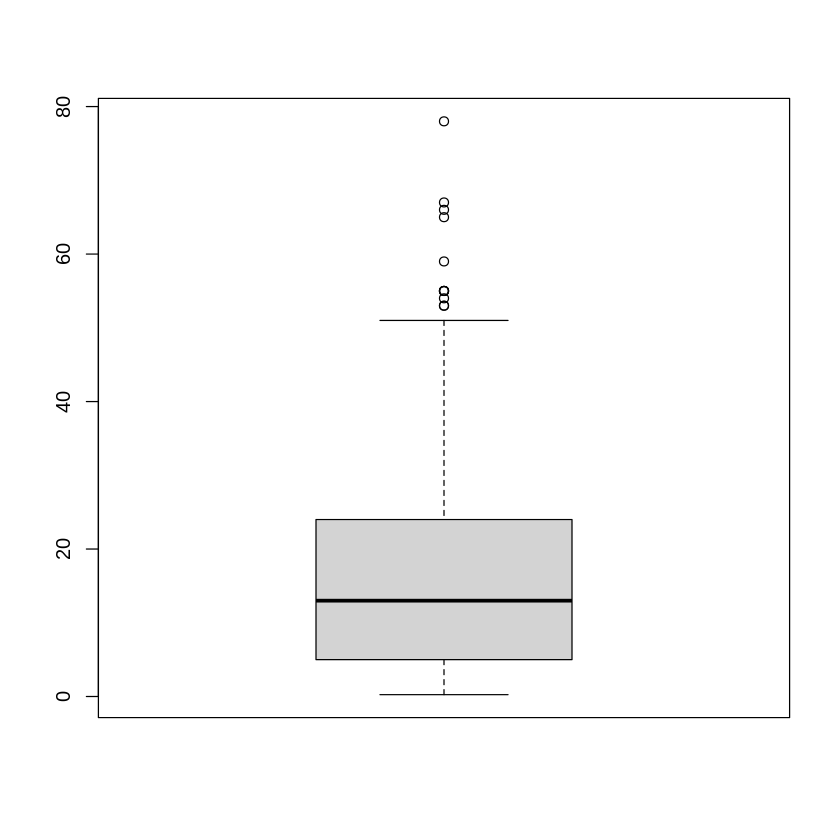

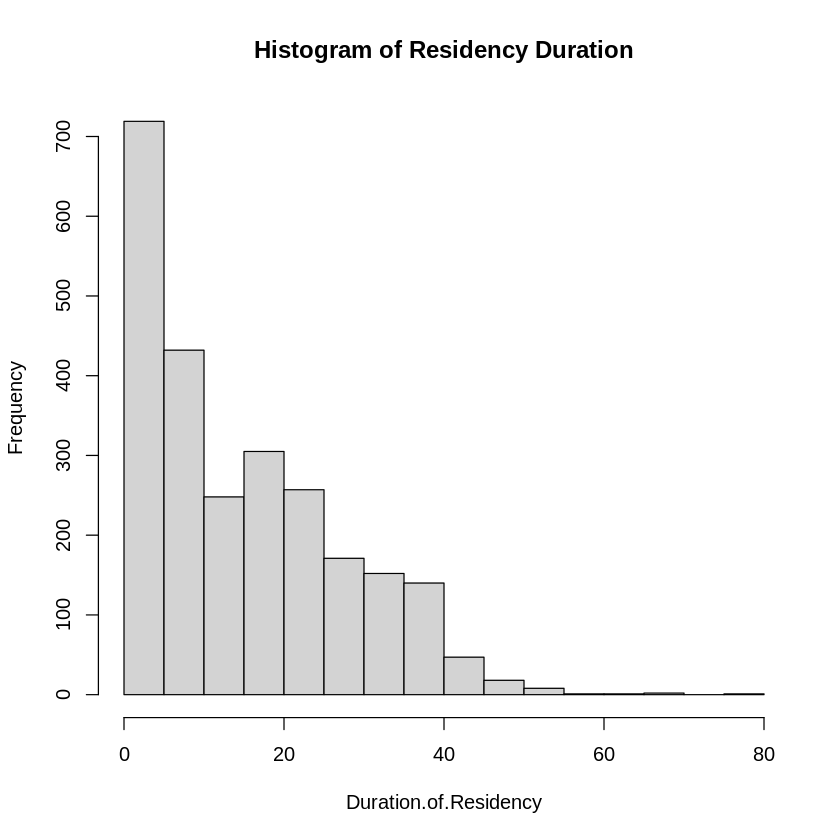

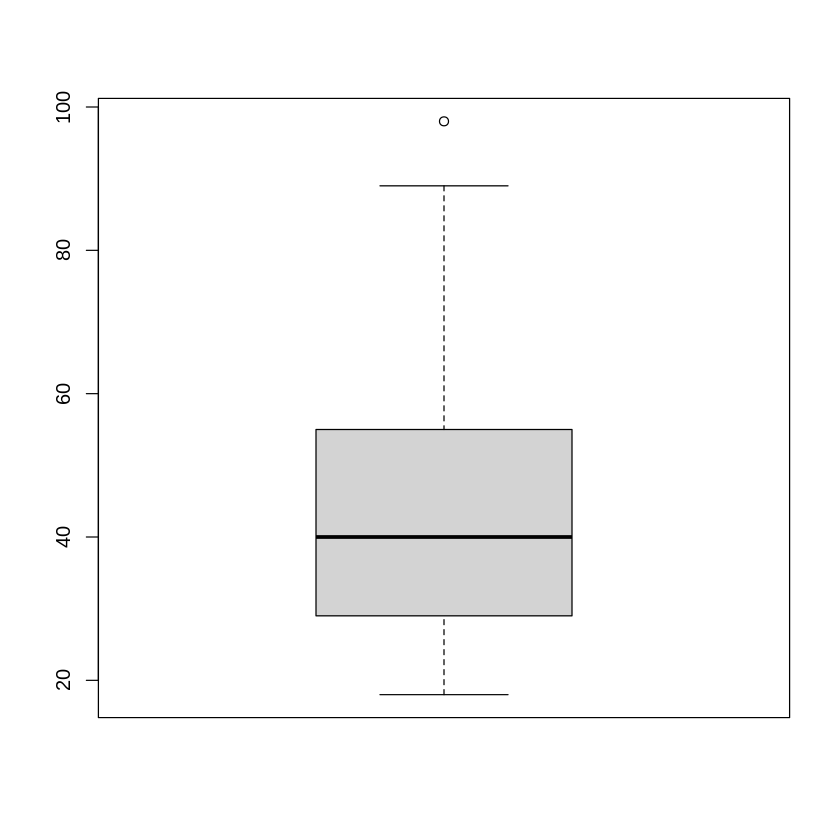

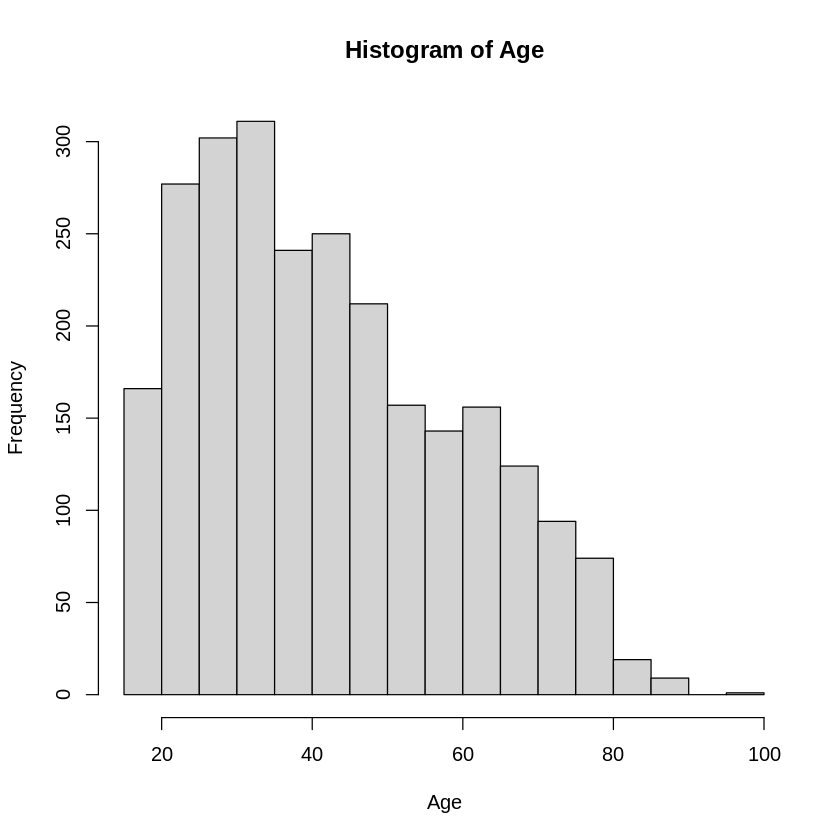

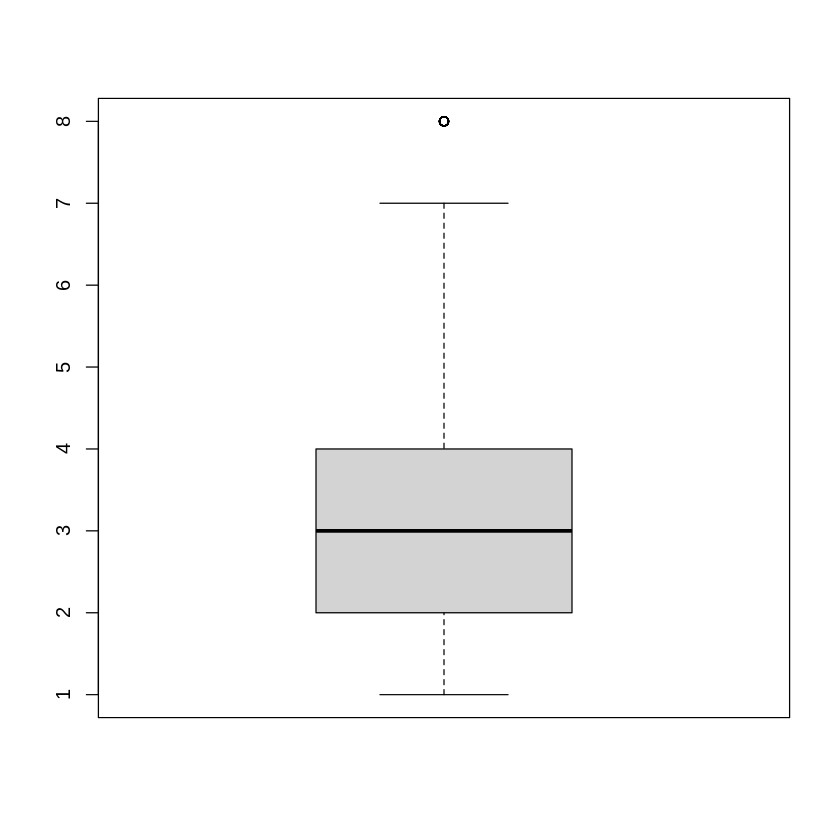

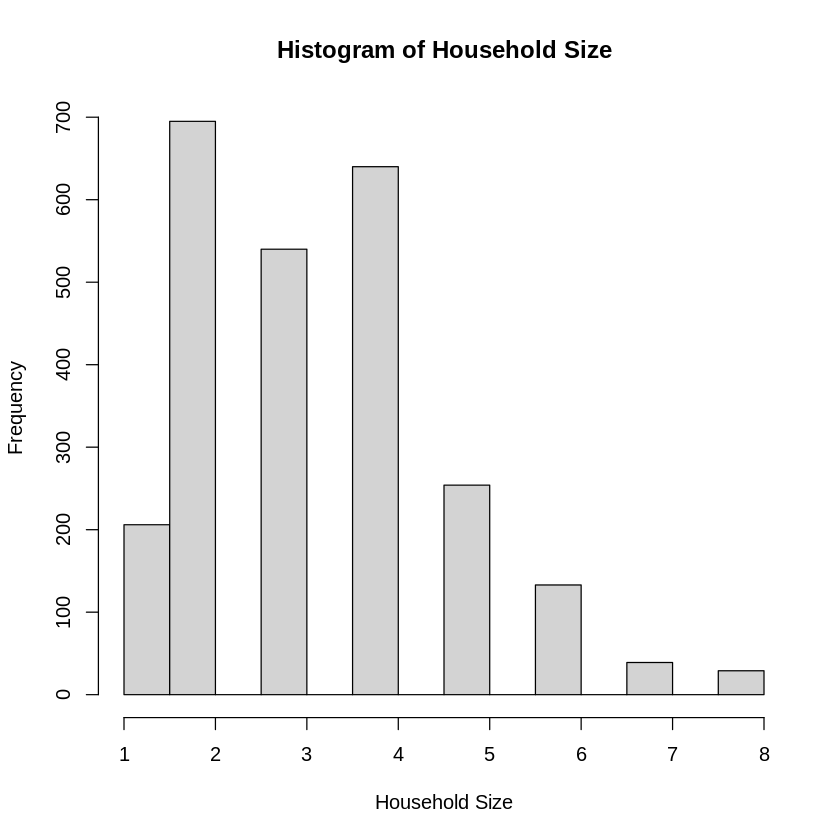

In [111]:

boxplot(tib3$Duration.of.Residency)
hist(tib3$Duration.of.Residency, xlab = "Duration.of.Residency", main = "Histogram of Residency Duration")

boxplot(tib3$Age)
hist(tib3$Age, xlab = "Age", main = "Histogram of Age")

boxplot(tib3$Household.Size)
hist(tib3$Household.Size, xlab = "Household Size", main = "Histogram of Household Size")

6 people over the age of 80 are detected as outliers.
2 Surveyors with duration of residency over 50 years are detected as outliers.

We decided against excluding age as a factor of outlier detection.

> Indented block




In [113]:
Q1 <- quantile(tib3$Duration.of.Residency, .25, na.rm = T)
Q3 <- quantile(tib3$Duration.of.Residency, .75, na.rm = T)
IQR <- IQR(tib3$Duration.of.Residency, na.rm = T)
tib4 <- subset(tib3, tib3$Duration.of.Residency > (Q1 - 1.5*IQR) & tib3$Duration.of.Residency < (Q3 + 1.5*IQR))

dim(tib3)
dim(tib4)

[1] 2536  209

[1] 2490  209

Removing Outliers detected with Duration of Residency.
